In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
! pip install scikit-learn --user

Text(0, 0.5, 'Deslocamento(cm)')

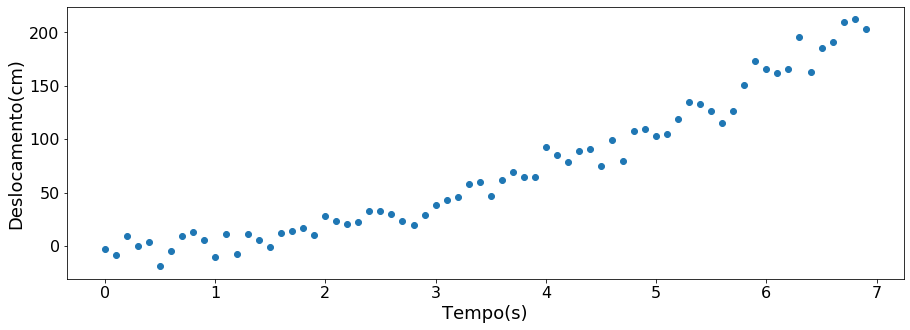

In [3]:
t=np.arange(0,7,.1)
X=(0.9*9.8*t**2)/2.+10*np.random.randn(t.shape[0])

plt.figure(figsize=(15, 5))
plt.plot(t, X, 'o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Tempo(s)', fontsize=18)
plt.ylabel('Deslocamento(cm)', fontsize=18)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(t.reshape(-1,1), X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [5]:
pred = lr.predict(t.reshape(-1,1))

Text(0, 0.5, 'Deslocamento(cm)')

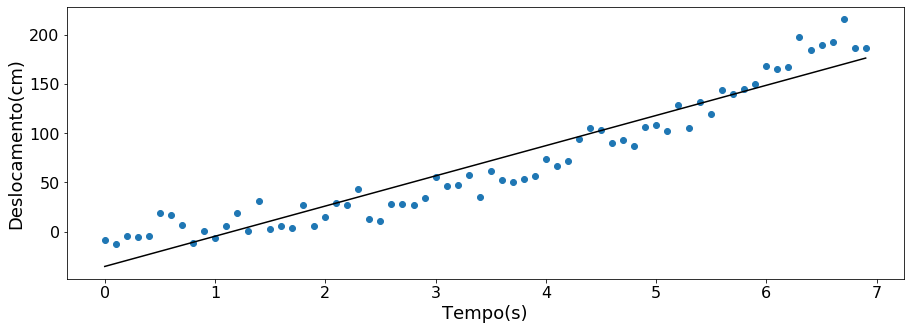

In [6]:
#isso é um subajuste
t=np.arange(0,7,.1)
X=(0.9*9.8*t**2)/2.+10*np.random.randn(t.shape[0])

plt.figure(figsize=(15, 5))
plt.plot(t, X, 'o')
plt.plot(t, pred, 'k-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Tempo(s)', fontsize=18)
plt.ylabel('Deslocamento(cm)', fontsize=18)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=200)

#tempo transformado
t_t = pf.fit_transform(t.reshape(-1, 1))
t_t

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.00000000e-001, 1.00000000e-002, ...,
        1.00000000e-198, 1.00000000e-199, 1.00000000e-200],
       [1.00000000e+000, 2.00000000e-001, 4.00000000e-002, ...,
        4.01734511e-139, 8.03469022e-140, 1.60693804e-140],
       ...,
       [1.00000000e+000, 6.70000000e+000, 4.48900000e+001, ...,
        3.65435669e+163, 2.44841898e+164, 1.64044072e+165],
       [1.00000000e+000, 6.80000000e+000, 4.62400000e+001, ...,
        6.86696313e+164, 4.66953493e+165, 3.17528375e+166],
       [1.00000000e+000, 6.90000000e+000, 4.76100000e+001, ...,
        1.23628889e+166, 8.53039333e+166, 5.88597140e+167]])

In [8]:
pd.DataFrame(t_t)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.1,0.01,0.001,0.0001,0.00001,0.000001,1.000000e-07,1.000000e-08,1.000000e-09,...,1.000000e-191,1.000000e-192,1.000000e-193,1.000000e-194,1.000000e-195,1.000000e-196,1.000000e-197,1.000000e-198,1.000000e-199,1.000000e-200
2,1.0,0.2,0.04,0.008,0.0016,0.00032,0.000064,1.280000e-05,2.560000e-06,5.120000e-07,...,3.138551e-134,6.277102e-135,1.255420e-135,2.510841e-136,5.021681e-137,1.004336e-137,2.008673e-138,4.017345e-139,8.034690e-140,1.606938e-140
3,1.0,0.3,0.09,0.027,0.0081,0.00243,0.000729,2.187000e-04,6.561000e-05,1.968300e-05,...,1.349459e-100,4.048377e-101,1.214513e-101,3.643539e-102,1.093062e-102,3.279185e-103,9.837555e-104,2.951267e-104,8.853800e-105,2.656140e-105
4,1.0,0.4,0.16,0.064,0.0256,0.01024,0.004096,1.638400e-03,6.553600e-04,2.621440e-04,...,9.850502e-77,3.940201e-77,1.576080e-77,6.304321e-78,2.521728e-78,1.008691e-78,4.034765e-79,1.613906e-79,6.455625e-80,2.582250e-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.0,6.5,42.25,274.625,1785.0625,11602.90625,75418.890625,4.902228e+05,3.186448e+06,2.071191e+07,...,1.846933e+155,1.200506e+156,7.803292e+156,5.072139e+157,3.296891e+158,2.142979e+159,1.392936e+160,9.054086e+160,5.885156e+161,3.825351e+162
66,1.0,6.6,43.56,287.496,1897.4736,12523.32576,82653.950016,5.455161e+05,3.600406e+06,2.376268e+07,...,3.411078e+156,2.251312e+157,1.485866e+158,9.806714e+158,6.472431e+159,4.271804e+160,2.819391e+161,1.860798e+162,1.228127e+163,8.105636e+163
67,1.0,6.7,44.89,300.763,2015.1121,13501.25107,90458.382169,6.060712e+05,4.060677e+06,2.720653e+07,...,6.029584e+157,4.039821e+158,2.706680e+159,1.813476e+160,1.215029e+161,8.140692e+161,5.454264e+162,3.654357e+163,2.448419e+164,1.640441e+165
68,1.0,6.8,46.24,314.432,2138.1376,14539.33568,98867.482624,6.722989e+05,4.571632e+06,3.108710e+07,...,1.021415e+159,6.945624e+159,4.723024e+160,3.211656e+161,2.183926e+162,1.485070e+163,1.009848e+164,6.866963e+164,4.669535e+165,3.175284e+166


In [9]:
lr = LinearRegression(normalize=True)
lr.fit(t_t, X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
pred = lr.predict(t_t)

Text(0, 0.5, 'Deslocamento(cm)')

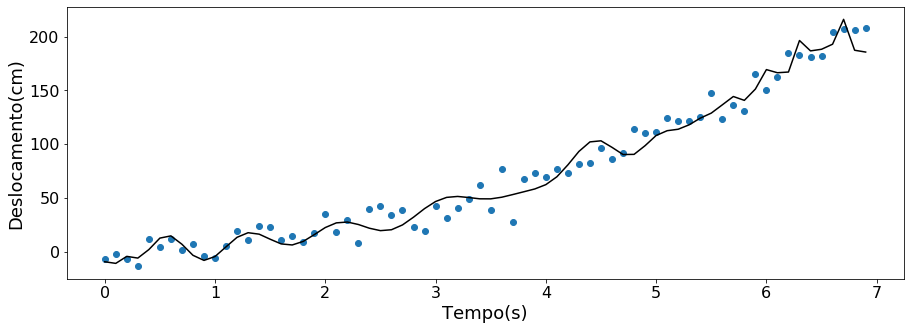

In [11]:
#isso é um overfit, tá pegando tudo quando é erro

t=np.arange(0,7,.1)
X=(0.9*9.8*t**2)/2.+10*np.random.randn(t.shape[0])

plt.figure(figsize=(15, 5))
plt.plot(t, X, 'o')
plt.plot(t, pred, 'k-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Tempo(s)', fontsize=18)
plt.ylabel('Deslocamento(cm)', fontsize=18)

In [12]:
pf = PolynomialFeatures(degree=2, include_bias=False)

#tempo transformado
t_t = pf.fit_transform(t.reshape(-1, 1))

pd.DataFrame(t_t)

,0,1
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
...,...,...
65,6.5,42.25
66,6.6,43.56
67,6.7,44.89
68,6.8,46.24


In [13]:
lr = LinearRegression(normalize=True)
lr.fit(t_t, X)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
pred = lr.predict(t_t)
pred

array([  1.00630935,   1.00305702,   1.08970401,   1.26625029,
         1.53269587,   1.88904076,   2.33528495,   2.87142844,
         3.49747123,   4.21341333,   5.01925472,   5.91499542,
         6.90063542,   7.97617473,   9.14161333,  10.39695124,
        11.74218845,  13.17732496,  14.70236077,  16.31729589,
        18.0221303 ,  19.81686402,  21.70149704,  23.67602937,
        25.74046099,  27.89479192,  30.13902215,  32.47315168,
        34.89718051,  37.41110865,  40.01493608,  42.70866282,
        45.49228886,  48.36581421,  51.32923885,  54.3825628 ,
        57.52578605,  60.7589086 ,  64.08193045,  67.49485161,
        70.99767207,  74.59039182,  78.27301089,  82.04552925,
        85.90794691,  89.86026388,  93.90248015,  98.03459572,
       102.2566106 , 106.56852477, 110.97033825, 115.46205103,
       120.04366311, 124.71517449, 129.47658518, 134.32789517,
       139.26910446, 144.30021305, 149.42122094, 154.63212814,
       159.93293463, 165.32364043, 170.80424554, 176.37

Text(0, 0.5, 'Deslocamento(cm)')

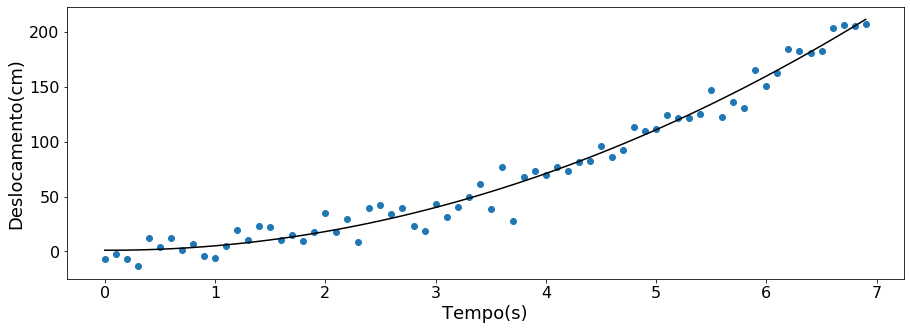

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(t, X, 'o')
plt.plot(t, pred, 'k-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Tempo(s)', fontsize=18)
plt.ylabel('Deslocamento(cm)', fontsize=18)

In [16]:
lr.coef_

array([-0.48201972,  4.4949651 ])

In [17]:
#descobrindo o grau da equação sem informações
from sklearn.model_selection import train_test_split

t_tr, t_ts, X_tr, X_ts = train_test_split(t, X, test_size=.3)

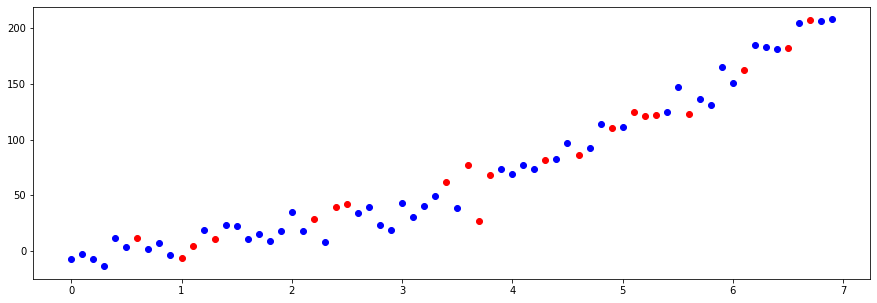

In [18]:
plt.figure(figsize=(15,5))
plt.plot(t_tr, X_tr, 'bo')
plt.plot(t_ts, X_ts, 'ro')

In [27]:
graus=range(1,30)
erros=[]

for n_pol in graus: 
    pf=PolynomialFeatures(degree=n_pol)
    t_tr_t = pf.fit_transform(t_tr.reshape(-1,1))
    t_ts_t = pf.transform(t_ts.reshape(-1,1))
    
    lr=LinearRegression(normalize=True)
    lr.fit(t_tr_t, X_tr)
    
    pred = lr.predict(t_ts_t)
    
    #MAE: Mean Absolute Error
    erros.append(np.mean(np.abs(pred-X_ts)))
    

In [28]:
erros

[12.083066741513386,
 9.027005088603232,
 8.949543197980862,
 9.813328078150267,
 9.80204506899748,
 9.83589223220432,
 10.51569781086997,
 10.074563737038577,
 10.013645481165813,
 10.019454224454845,
 10.22770492791743,
 10.065342157223691,
 10.060648593486798,
 10.365252693579336,
 10.296297426582255,
 10.343715552042164,
 9.538131726442668,
 9.465933315002232,
 10.451869067999862,
 10.386861190575932,
 10.681395113280015,
 10.767722579306513,
 10.968764612406828,
 11.504456865192363,
 11.50918316415663,
 11.508435640180327,
 10.905964264883753,
 10.811098193455182,
 10.735836081767488]

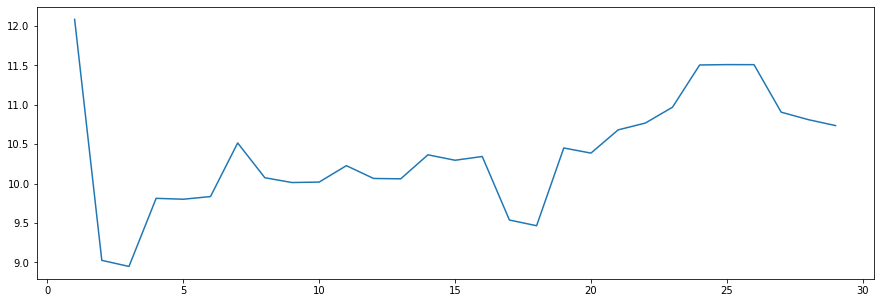

In [37]:
plt.figure(figsize=(15,5))
plt.plot(graus, erros)


In [26]:
n_pol=3
pf=PolynomialFeatures(degree=n_pol)
t_tr_t = pf.fit_transform(t_tr.reshape(-1,1))
t_ts_t = pf.transform(t_ts.reshape(-1,1))
t_t = pf.transform(t.reshape(-1,1))
    
lr=LinearRegression(normalize=True)
lr.fit(t_tr_t, X_tr)
    
pred = lr.predict(t_t)

Text(0, 0.5, 'Deslocamento(cm)')

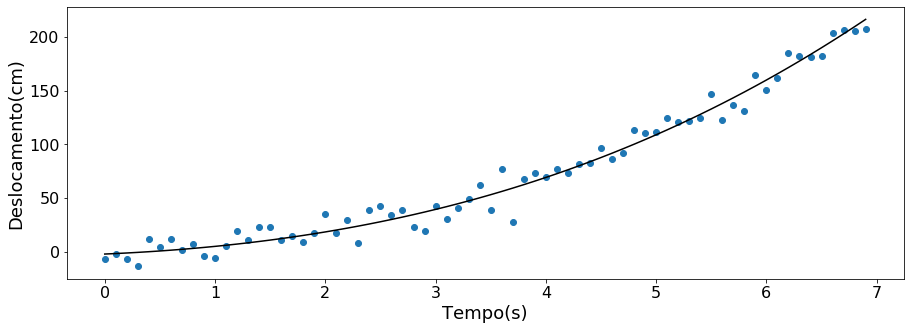

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(t, X, 'o')
plt.plot(t, pred, 'k-')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Tempo(s)', fontsize=18)
plt.ylabel('Deslocamento(cm)', fontsize=18)

In [24]:
lr.coef_

array([0.        , 4.41548789, 2.53904705, 0.20571554])